## Configuration de l'environnement pour le projet MNIST

Création d'un environnement virtuel `DeepLearningE4` et installation des dépendances via un fichier `requirements.txt`. Résolution des problèmes de certificat SSL avec `certifi` pour le téléchargement des données MNIST.


In [4]:
import ssl
import certifi

ssl._create_default_https_context = ssl._create_unverified_context
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())


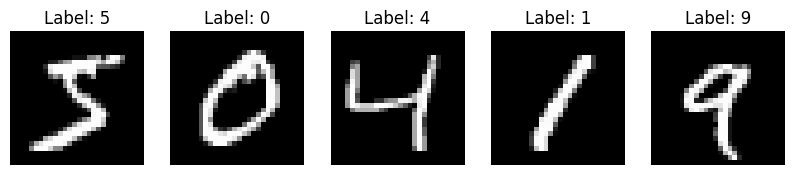

In [8]:
import numpy as np
from tensorflow.keras.datasets import mnist

# On commence par importer la base de données MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pour s'assurer que ça a été correctement importé, on affiche les premiers éléments
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.show()


On affiche les premiers élèments de la liste ainsi que d'autres paramètres pour s'assurer que le jeu de données a été correctement importé et comment il est composé.

In [9]:
# nb d'images et d'étiquettes dans chaque ensemble (train et test)
print(f'Nombre d\'images d\'entraînement: {train_images.shape[0]}')
print(f'Nombre d\'images de test: {test_images.shape[0]}')

# dimensions des images
print(f'Dimensions des images: {train_images.shape[1]}x{train_images.shape[2]} pixels')

# types de données
print(f'Type de données des images: {train_images.dtype}')
print(f'Type de données des étiquettes: {train_labels.dtype}')

# distribution des étiquettes (tjr pour train et test)
unique, counts = np.unique(train_labels, return_counts=True)
print(f'Distribution des étiquettes d\'entraînement: {dict(zip(unique, counts))}')
unique, counts = np.unique(test_labels, return_counts=True)
print(f'Distribution des étiquettes de test: {dict(zip(unique, counts))}')

Nombre d'images d'entraînement: 60000
Nombre d'images de test: 10000
Dimensions des images: 28x28 pixels
Type de données des images: uint8
Type de données des étiquettes: uint8
Distribution des étiquettes d'entraînement: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Distribution des étiquettes de test: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


## Préparation des données
La normalisation des données sera identique pour tous les modèles. Pour les architectures nécessitant des données sous forme de vecteurs (comme les perceptrons multicouches), nous avons également aplati les images. Cependant, certaines architectures, comme les réseaux de neurones convolutionnels (CNN), nécessitent que les images restent sous forme matricielle et peuvent nécessiter d'autres formes de préparation spécifique. Nous adapterons la préparation des données en fonction du type de modèle lorsque nous arriverons à ces étapes du projet. Pour l'instant, nous avons normalisé et aplati les données.
Nous avons également besoin qu eles étiquettes soient sous une forme "one-hot encoded" puisque nous envisageons d'utiliser la fonction de perte 'categorical_crossentropy' qui attend les étiquettes dans ce format.


In [30]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisation des données 
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Affichage des valeurs minimales et maximales pour confirmer la normalisation (doit être entre 0 et 1)
print(f'Valeur minimale dans les images d\'entraînement: {train_images.min()}')
print(f'Valeur maximale dans les images d\'entraînement: {train_images.max()}')
print(f'Valeur minimale dans les images de test: {test_images.min()}')
print(f'Valeur maximale dans les images de test: {test_images.max()}')

Valeur minimale dans les images d'entraînement: 0.0
Valeur maximale dans les images d'entraînement: 1.0
Valeur minimale dans les images de test: 0.0
Valeur maximale dans les images de test: 1.0


In [37]:
# Redimensionnement des images 
train_images_flat = train_images.reshape((60000, 784))  # 784 = 28x28
test_images_flat = test_images.reshape((10000, 784))

print("Forme des images d'entraînement aplatis: ", train_images_flat.shape)
print("Forme des images de test aplatis: ", test_images_flat.shape)


Forme des images d'entraînement aplatis:  (60000, 784)
Forme des images de test aplatis:  (10000, 784)


In [43]:
from tensorflow.keras.utils import to_categorical

# Conversion des étiquettes en format one-hot
train_labels_categorical = to_categorical(train_labels, 10)
test_labels_categorical = to_categorical(test_labels, 10)

print("Forme des étiquettes d'entraînement one-hot: ", train_labels_categorical.shape)
print("Forme des étiquettes de test one-hot: ", test_labels_categorical.shape)


Forme des étiquettes d'entraînement one-hot:  (60000, 10)
Forme des étiquettes de test one-hot:  (10000, 10)


## Modèle à 1 couche

### Définir le modèle
La couche aura 10 unités de sortie car nous avons 10 classes possibles dans le jeu de données MNIST (les chiffres de 0 à 9).
Nous utiliserons la fonction softmax.

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Création du modèle
modele_1_couche = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))  # 784 correspond à 28x28 pixels aplatis
])



/Users/yacin.baltagi/envs/DeepLearningE4/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiler le modèle

In [58]:
modele_1_couche.compile(
    optimizer='adam',  
    loss='categorical_crossentropy',  
    metrics=['accuracy']  
)


### Entraîner le modèle

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7878 - loss: 0.8033 - val_accuracy: 0.9138 - val_loss: 0.3182
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9097 - loss: 0.3239 - val_accuracy: 0.9188 - val_loss: 0.2899
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9172 - loss: 0.2934 - val_accuracy: 0.9237 - val_loss: 0.2751
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9202 - loss: 0.2897 - val_accuracy: 0.9259 - val_loss: 0.2716
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9248 - loss: 0.2752 - val_accuracy: 0.9268 - val_loss: 0.2663
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9278 - loss: 0.2591 - val_accuracy: 0.9280 - val_loss: 0.2653
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9248 - loss: 0.2697 - val_accuracy: 0.9284 - val_loss: 0.2615
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9279 -

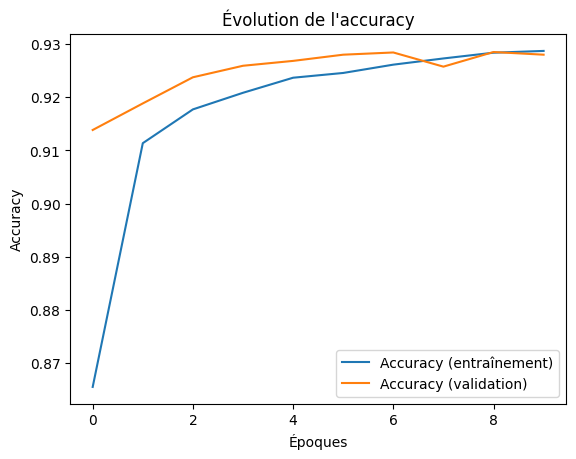

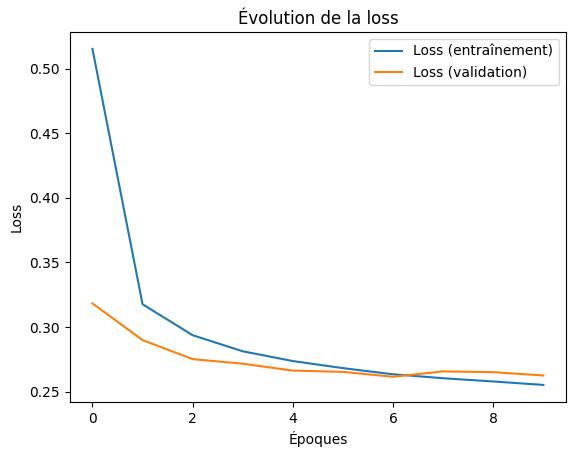

In [59]:
history = modele_1_couche.fit(
    train_images_flat,  
    train_labels_categorical,  
    epochs=10,  
    validation_split=0.2 
)

# Affichage de l'évolution de l'entraînement
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy (entraînement)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.title('Évolution de l\'accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss (entraînement)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Évolution de la loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Test du modèle sur des données jamais vues

In [60]:
test_loss, test_accuracy = modele_1_couche.evaluate(test_images_flat, test_labels_categorical)

print(f'Loss sur l\'ensemble de test: {test_loss}')
print(f'Accuracy sur l\'ensemble de test: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9169 - loss: 0.3028
Loss sur l'ensemble de test: 0.2687511146068573
Accuracy sur l'ensemble de test: 0.9261000156402588


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


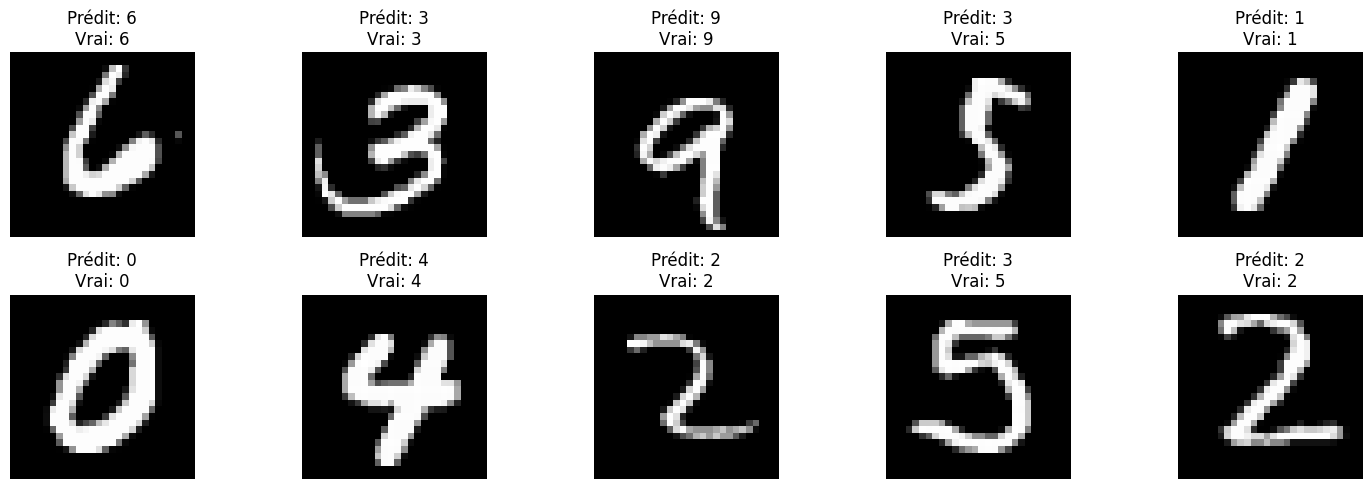

In [61]:
# On va choisir des images random pour voir le résultat de la prédiction
indices = np.random.choice(range(len(test_images)), 10)
images = test_images[indices]
labels = test_labels[indices]
flat_images = test_images_flat[indices]

predictions = modele_1_couche.predict(flat_images)

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Prédit: {np.argmax(predictions[i])}\nVrai: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

On affiche certains résultats tirés aléatoirement pour avoir une illustration directe.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step


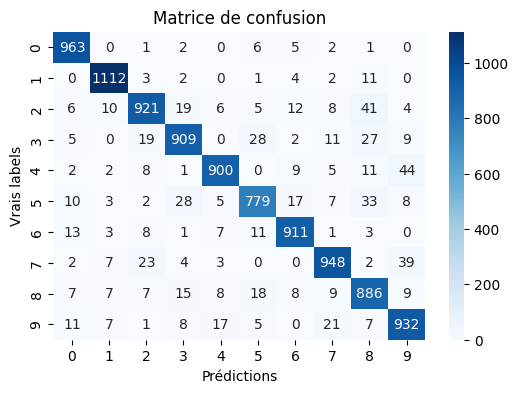

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_classes = np.argmax(modele_1_couche.predict(test_images_flat), axis=1)

cm = confusion_matrix(test_labels, pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Vrais labels')
plt.xlabel('Prédictions')
plt.show()
